In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Descripcion de los datos

- Cargamos archivo
- Mostramos datos
- El campo clase contiene los datos objetivos.  0  para Windows, 1 Mac , 2 para Linux
- Graficamos histograma de los demás campos.

In [2]:
df= pd.read_csv(r'usuarios_win_mac_lin.csv')

In [3]:
df.head()

duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2

In [4]:
df.describe()

duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.000000  378.000000    2.000000

In [5]:
df.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

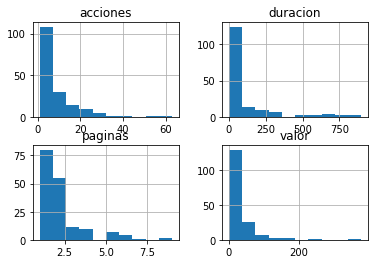

In [6]:
df.drop(['clase'],1).hist()
plt.show()

## Crear modelo de regresion logística.

Cargamos las variables de las 4 columnas de entrada X excluyendo la columna `clase` pero cargandola en `y` 

In [7]:
X = np.array(df.drop(['clase'],1))
y = np.array(df['clase'])

- Creamos el modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas y

In [9]:
modelo = linear_model.LogisticRegression()
modelo.fit(X,y)

C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Una vez compilado nuestro modelo le hacemos clasificar nuestro conjunto de entradas X utilizando el método `predict(X)` y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo

In [11]:
predicciones = modelo.predict(X)

In [13]:
print(predicciones)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0 1 0 0 2 0
 0 1 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 1 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Revisamos cuan bueno fue nuestro modelo utilizando `modelo.score()` que nos devuelve la precision media de las predicciones.

In [16]:
modelo.score(X,y)

0.7764705882352941

### Validación del modelo

Una buena práctica en Machine Learning es la de subdividir el conjunto de datos en un set de entrenamiento y otro para validar el modelo (que no es el mismo para entrenar al modelo). Esto evtará problemas en los que el algoritmo pueda fallar.

Para esto dividimos los datos en forma aleatoria (mezclados) 80% para entrenamiento y 20% para validación.

In [30]:
pct_validacion = 0.20
seed=7
X_train,X_validation, Y_train, Y_validation = model_selection.train_test_split(X,y,test_size=pct_validacion, random_state=seed)
model=linear_model.LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
name="Regresion Lógica"
kfold= model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
print(msg)

Regresion Lógica: 0.743407 (0.115752)


C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

- Realizamos las predicciones


In [32]:
predicciones = model.predict(X_validation)
print(accuracy_score(Y_validation, predicciones))

0.7941176470588235


In [33]:
predicciones

array([1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2], dtype=int64)

La matriz de confusion donde muestra cuántos resutados equivocados tuvo cada clase (los que están fuera de la diagonal) por ejemplo predijo 3 ususarios de Mac como usuarios de Windows y predijo 2 usuarios de Linux que realmente eran de Windows

In [34]:
print(confusion_matrix(Y_validation,predicciones))

[[14  2  2]
 [ 3  3  0]
 [ 0  0 10]]


También podemos ver el reporte de clasificación con nuestro conjunto de validación. En nuestro caso vemos que se utilizaron como soporte 18 registros windows, 6 de Mac y 10 de Linux (Total de 34). Podemos ver la precision con la que se acertaron cada una de las clases y vemos que por ejemplo Mac tuvo 3 aciertos y trea fallos (0.5 recall).
La valoración que de aquí nos convine tener en cuenta es la de **F1-score**, que tiene en cuenta la precisión y recall. El promedio de F1 es de 0.75333

### Métricas

La Precisión de una clase define cuan confiable es un modelo en responder si un punto pertenece a esa clase.

El Recall de una clase expresa cuan bien puede el modelo detectar a esa clase.

El F1 Score de una clase es dada por la media harmonía de precisión y recall (2 x precision x recall / (precision+recall)) digamos que combina precisión y recall en una sola métrica. 

#### Tenemos cuatro casos posibles para cada clase: 
- Alta precision y alto recall: el modelo maneja perfectamente esa clase
- Alta precision y bajo recall: el modelo no detecta la clase muy bien, pero cuando lo hace es altamente confiable.
- Baja precisión y alto recall: La clase detecta bien la clase pero también incluye muestras de otras clases.
- Baja precisión y bajo recall: El modelo no logra clasificar la clase correctamente.

In [37]:
print(classification_report(Y_validation,predicciones))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.60      0.50      0.55         6
           2       0.83      1.00      0.91        10

   micro avg       0.79      0.79      0.79        34
   macro avg       0.75      0.76      0.75        34
weighted avg       0.79      0.79      0.79        34

